<a href="https://colab.research.google.com/github/LucjanSakowicz/data-science-bootcamp/blob/main/09_exercises/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.22.4'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [7]:
google = fetch_financial_data("GOOGL")
google

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-19,123.5500,125.9700,122.1500,122.7600,41353445
2023-05-18,120.9500,123.3100,120.8300,122.8300,35234233
2023-05-17,119.6100,121.6700,118.8900,120.8400,33323588
2023-05-16,116.4900,120.7500,116.4300,119.5100,45035558
2023-05-15,116.1100,118.4800,116.0100,116.5100,36266765
...,...,...,...,...,...
2018-05-30,53.6740,53.9495,53.3275,53.8735,28685640
2018-05-29,53.8000,54.0670,53.1540,53.4035,36076100
2018-05-25,54.3275,54.4785,54.1300,54.2040,22223220


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-05-19 to 2018-05-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [9]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,89.232959,90.262922,88.243580,89.281346,3.490316e+07
std,29.669687,29.967724,29.324097,29.641635,1.556983e+07
min,49.216000,50.606000,48.883000,49.233500,9.312760e+06
25%,60.925000,61.393500,60.350000,60.792500,2.506828e+07
50%,86.375000,87.418000,85.750000,86.546000,3.104722e+07
75%,113.170000,114.489000,112.001000,113.575000,4.000712e+07
max,151.250000,151.547000,148.899000,149.838000,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [10]:
pd.options.display.precision = 2

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [11]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,89.23,90.26,88.24,89.28,34903161.66
std,29.67,29.97,29.32,29.64,15569831.68
min,49.22,50.61,48.88,49.23,9312760.00
25%,60.92,61.39,60.35,60.79,25068280.00
50%,86.38,87.42,85.75,86.55,31047224.00
75%,113.17,114.49,112.00,113.58,40007120.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date'>

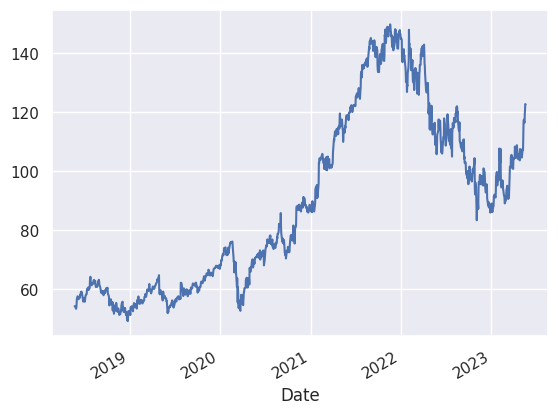

In [12]:
google["Close"].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [13]:
google.reset_index(inplace=True)

Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [20]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2023-05-19,123.55,125.97,122.15,122.76,41353445,5,2023
1,2023-05-18,120.95,123.31,120.83,122.83,35234233,5,2023
2,2023-05-17,119.61,121.67,118.89,120.84,33323588,5,2023
3,2023-05-16,116.49,120.75,116.43,119.51,45035558,5,2023
4,2023-05-15,116.11,118.48,116.01,116.51,36266765,5,2023
...,...,...,...,...,...,...,...,...
1252,2018-05-30,53.67,53.95,53.33,53.87,28685640,5,2018
1253,2018-05-29,53.80,54.07,53.15,53.40,36076100,5,2018
1254,2018-05-25,54.33,54.48,54.13,54.20,22223220,5,2018
1255,2018-05-24,54.34,54.36,53.62,54.27,20603880,5,2018


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [48]:
google.groupby('Year').aggregate({'Close': np.mean})

#lub
google.groupby('Year')['Close'].mean()

Year
2018    57.19
2019    59.56
2020    73.95
2021   124.22
2022   114.76
2023   100.50
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Year'>

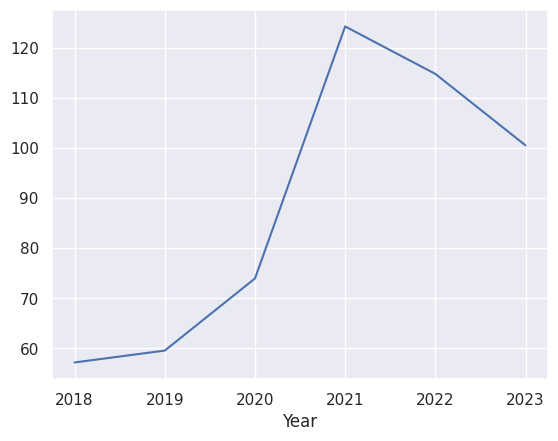

In [49]:
google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [27]:
google.groupby('Month').aggregate({'Close': np.mean})

,Close
Month,
1,88.45
2,93.05
3,91.62
4,93.54
5,89.95
6,83.85
7,86.31
8,90.70
9,88.91


Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Month'>

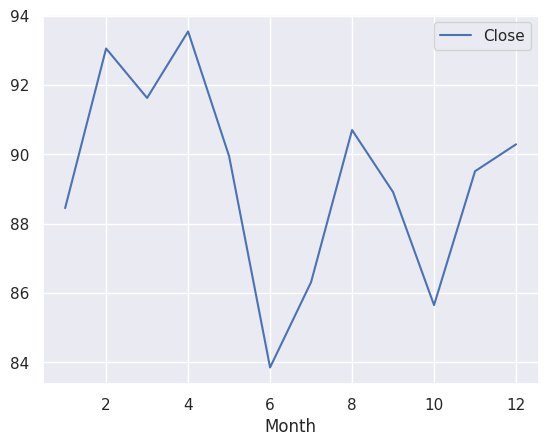

In [28]:
google.groupby('Month').aggregate({'Close': np.mean}).plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [29]:
google.groupby(['Year', 'Month']).aggregate({'Close': np.mean})

Close
Year Month       
2018 5      54.18
     6      57.47
     7      60.06
     8      62.03
     9      59.25
...           ...
2023 1      93.04
     2      96.42
     3      98.06
     4     105.71
     5     112.77

[61 rows x 1 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [32]:
np.argmax(google['Close'])

376

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [52]:
google.iloc[[np.argmax(google['Close'])]]

,Date,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,,
2021-11-18,2021-11-18,148.24,150.58,147.88,149.84,35628220,11,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [34]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2023-05-19,123.55,122.76,41353445
1,2023-05-18,120.95,122.83,35234233
2,2023-05-17,119.61,120.84,33323588
3,2023-05-16,116.49,119.51,45035558
4,2023-05-15,116.11,116.51,36266765
...,...,...,...,...
1252,2018-05-30,53.67,53.87,28685640
1253,2018-05-29,53.80,53.40,36076100
1254,2018-05-25,54.33,54.20,22223220
1255,2018-05-24,54.34,54.27,20603880


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [35]:
google.set_index(google['Date'], inplace=True)

### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [46]:
google.drop(['Year', 'Month'], axis=1)
google

,Date,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,,
2023-05-19,2023-05-19,123.55,125.97,122.15,122.76,41353445,5,2023
2023-05-18,2023-05-18,120.95,123.31,120.83,122.83,35234233,5,2023
2023-05-17,2023-05-17,119.61,121.67,118.89,120.84,33323588,5,2023
2023-05-16,2023-05-16,116.49,120.75,116.43,119.51,45035558,5,2023
2023-05-15,2023-05-15,116.11,118.48,116.01,116.51,36266765,5,2023
...,...,...,...,...,...,...,...,...
2018-05-30,2018-05-30,53.67,53.95,53.33,53.87,28685640,5,2018
2018-05-29,2018-05-29,53.80,54.07,53.15,53.40,36076100,5,2018
2018-05-25,2018-05-25,54.33,54.48,54.13,54.20,22223220,5,2018


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [47]:
google.rename(columns={"Open": "Otwarcie", "High": "Najwyzszy", "Low":"Najnizszy", "Close":"Zamkniecie", "Volume":"Wolumen"})

,Date,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Month,Year
Date,,,,,,,,
2023-05-19,2023-05-19,123.55,125.97,122.15,122.76,41353445,5,2023
2023-05-18,2023-05-18,120.95,123.31,120.83,122.83,35234233,5,2023
2023-05-17,2023-05-17,119.61,121.67,118.89,120.84,33323588,5,2023
2023-05-16,2023-05-16,116.49,120.75,116.43,119.51,45035558,5,2023
2023-05-15,2023-05-15,116.11,118.48,116.01,116.51,36266765,5,2023
...,...,...,...,...,...,...,...,...
2018-05-30,2018-05-30,53.67,53.95,53.33,53.87,28685640,5,2018
2018-05-29,2018-05-29,53.80,54.07,53.15,53.40,36076100,5,2018
2018-05-25,2018-05-25,54.33,54.48,54.13,54.20,22223220,5,2018
